In [1]:
using StatsPlots, Plots
using Distributions 

In [2]:
plot();

# Zad 1

In [3]:
φ=0.2
N=1e3
N=Int(N)
σ²=0.4
X=zeros(N+1)
Z=rand(Normal(0,√σ²),N);

In [4]:
for i in 1:N
    X[i+1]=X[i]*φ+Z[i]
end

In [5]:
γ(X,h)=begin
    n=length(X)
    x=mean(X)
    sum(@. (X[h+1:end]-x)*(X[1:n-h]-x) )/n
end

γ (generic function with 1 method)

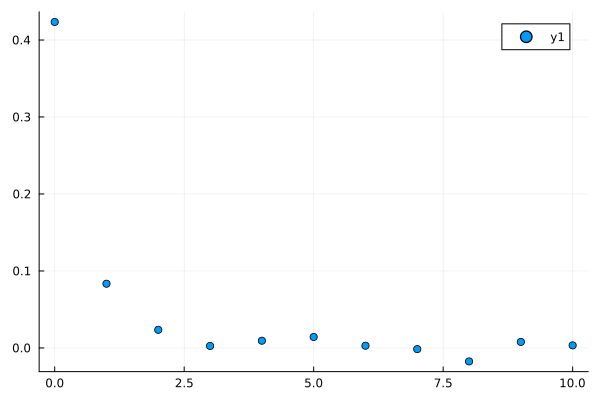

In [6]:
scatter(0:10,h->γ(X,h))

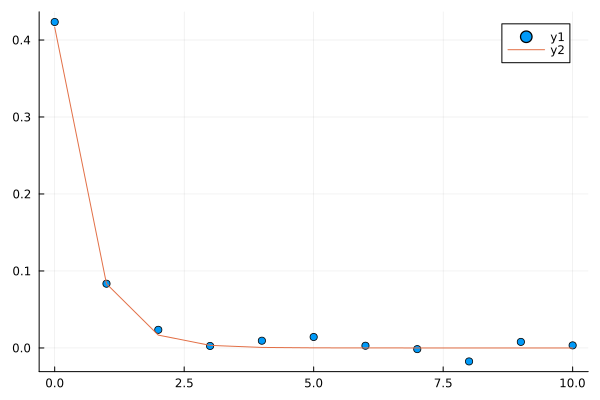

In [7]:
plot!(0:10,h->σ²*φ^h/(1-φ^2))

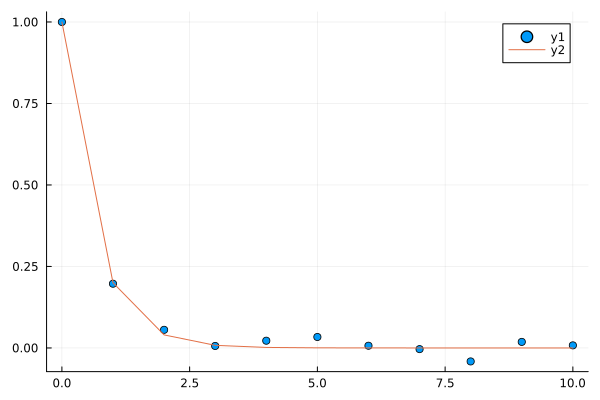

In [8]:
scatter(0:10,h->γ(X,h)/γ(X,0))
plot!(0:10,h->φ^h)

# Zad 2

In [9]:
φ=0.2
N=1e3
N=Int(N)
σ²=0.4


0.4

In [10]:
X=zeros(N+1)
Z=rand(Normal(0,√σ²),N);
for i in 1:N
    X[i+1]=X[i]*φ+Z[i]
end

In [11]:
zad2_temp(N,H;tup)=begin
    X=zeros(N+1)
    Z=rand(Normal(0,√σ²),N);
    for i in 1:N
        X[i+1]=X[i]*φ+Z[i]
    end
    res=[γ(X,h) for h in H]./(γ(X,0)^(tup==:corr))
end

zad2_temp (generic function with 1 method)

In [12]:
zad2(M,N,α,H;tup=:corr)=begin
    N=Int(N)
    M=Int(M)
    res=zeros(M,length(H))
    for i in 1:M
        res[i,:]=zad2_temp(N,H,tup=tup)
    end
    pes=zeros(length(H),2)
    for i in 1:length(H)
        pes[i,:]=[quantile(res[:,i],α/2),quantile(res[:,i],1-α/2)]
    end
    pes
end

zad2 (generic function with 1 method)

In [13]:
pes=zad2(100,1e3,0.05,0:20)

21×2 Matrix{Float64}:
  1.0        1.0
  0.149846   0.247048
 -0.0245828  0.0795635
 -0.0512784  0.0656028
 -0.0564999  0.0638257
 -0.0670216  0.043044
 -0.0556262  0.0439138
 -0.0516819  0.0676075
 -0.0572625  0.0587523
 -0.0523135  0.0587339
 -0.0687767  0.0539401
 -0.0740288  0.0636495
 -0.0609056  0.0613322
 -0.074081   0.0685747
 -0.0431532  0.0568459
 -0.0634009  0.0680428
 -0.0594511  0.0532901
 -0.054533   0.0598483
 -0.0642214  0.0527713
 -0.0540312  0.0610032
 -0.0637637  0.0485672

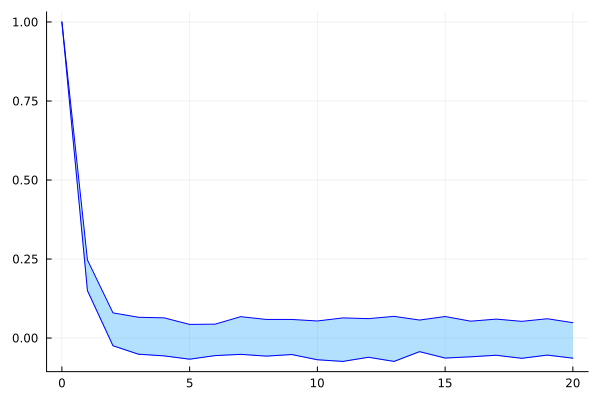

In [14]:
plot(leg=false)
plot!(0:20,pes[:,1],fillrange=pes[:,2],alpha=0.3)
plot!(0:20,h->pes[h+1,1],c=:blue)
plot!(0:20,h->pes[h+1,2],c=:blue)

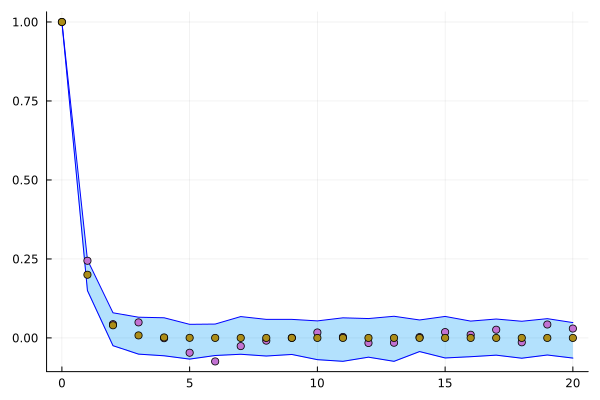

In [15]:
scatter!(0:20,h->γ(X,h)/γ(X,0))
scatter!(0:20,h->φ^h)

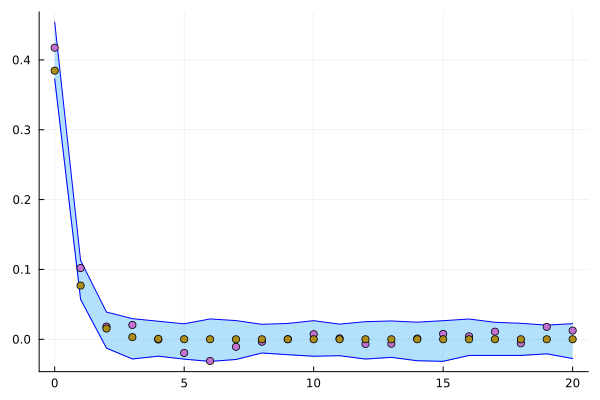

In [16]:
pes=zad2(100,1e3,0.05,0:20,tup=:cov)
plot(leg=false)
plot!(0:20,pes[:,1],fillrange=pes[:,2],alpha=0.3)
plot!(0:20,h->pes[h+1,1],c=:blue)
plot!(0:20,h->pes[h+1,2],c=:blue)
scatter!(0:20,h->γ(X,h))
scatter!(0:20,h->φ^h*σ²/(1+φ^2))

# Zad 3 (add)

In [17]:
ϕ=1
N=1e3
N=Int(N)
σ²=0.4
M=100
X=zeros(M,N+1)
for j in 1:M
    Z=rand(Normal(0,√σ²),N);
    for i in 1:N
        X[j,i+1]=X[j,i]*ϕ+Z[i]
    end
end

In [18]:
f(n,t)=begin
    var([X[j,t]-ϕ^(n+1)*X[j,t-n-1] for j in 1:M])
end

f (generic function with 1 method)

In [19]:
f(20,40)

9.093021186385563

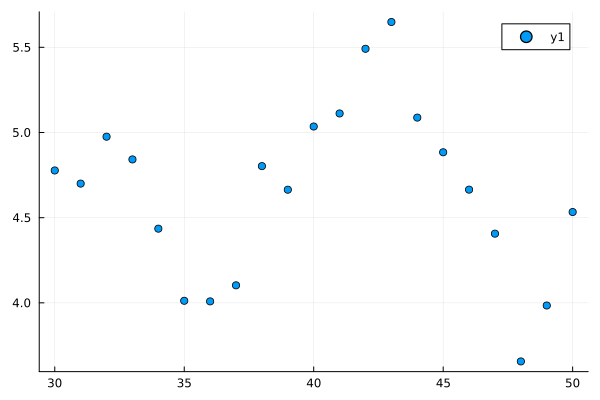

In [20]:
scatter(30:50, h->f(10,h))